In [46]:
import scipy.stats as sps
import matplotlib.pyplot as plt
import numpy as np

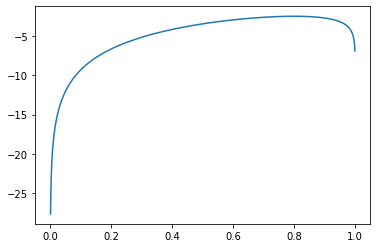

In [83]:
x = np.array([1,1,0,1,1])
pi = np.linspace(0,1,1001)

@np.vectorize
def lhood(p):
    return sps.bernoulli.logpmf(x,p = p).sum()

li = lhood(pi)
plt.plot(pi,li)

In [84]:
pi[li.argmax()]

0.8

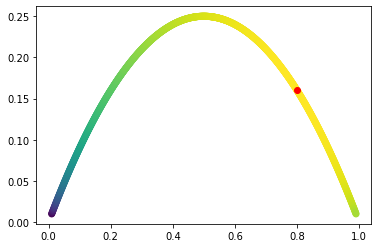

In [110]:
p  =  np.linspace(0.01,0.99,1001)
y  = p*(1-p)
l  = lhood(p)


phat = p[l.argmax()]
yhat = phat*(1-phat)

plt.scatter(p,y,c=l)
plt.scatter(phat,yhat,c='r')

In [96]:
ai = np.linspace(0,0.25,1001)
one = 1/2 - np.sqrt(1/4-ai)
two = 1/2 + np.sqrt(1/4-ai)

ai_one = lhood(one)
ai_two = lhood(two)
ai_max = np.where(ai_one > ai_two, ai_one, ai_two)

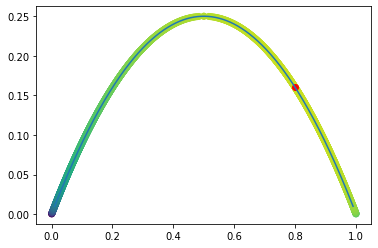

In [107]:
plt.plot(p,y)
plt.scatter(one,ai,c=ai_one, vmin=-30,vmax=0)
plt.scatter(two,ai,c=ai_two, vmin=-30,vmax=0)
plt.scatter(two[ai_two.argmax()],ai[ai_two.argmax()],c='r', vmin=-30,vmax=0)

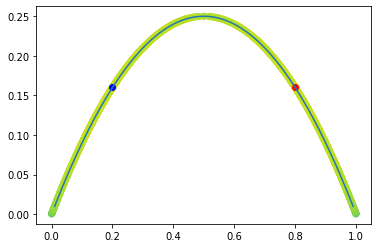

In [106]:
plt.plot(p,y)
plt.scatter(one,ai,c=ai_max, vmin=-30,vmax=0)
plt.scatter(two,ai,c=ai_max, vmin=-30,vmax=0)
plt.scatter(one[ai_max.argmax()],ai[ai_max.argmax()],c='b', vmin=-30,vmax=0)
plt.scatter(two[ai_max.argmax()],ai[ai_max.argmax()],c='r', vmin=-30,vmax=0)

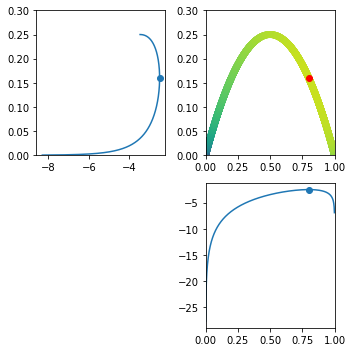

In [127]:
f,axarr=plt.subplots(2,2)
ax = axarr[0,0]
ax.plot(ai_max,ai)
ax.scatter(ai_max.max(),ai[ai_max.argmax()])
ax.set_ylim(0,0.3)

ax = axarr[0,1]
ax.scatter(one,ai,c=ai_one, vmin=-30,vmax=0)
ax.scatter(two,ai,c=ai_two, vmin=-30,vmax=0)
ax.scatter(two[ai_two.argmax()],ai[ai_two.argmax()],c='r', vmin=-30,vmax=0)
ax.set_xlim(0,1)
ax.set_ylim(0,0.3)

ax = axarr[1,1]
ax.plot(pi,li)
ax.scatter(pi[li.argmax()],li[li.argmax()])
ax.set_xlim(0,1)

axarr[1,0].axis('off')
f.set_size_inches(5,5)
f.set_tight_layout(True)

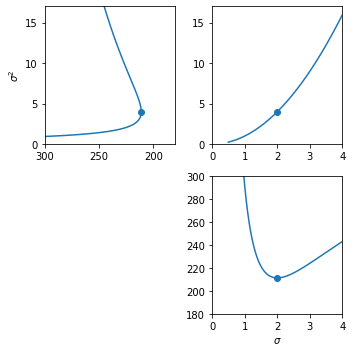

In [175]:
sigmas  = np.linspace(0.5,4.5,1001)
x = sps.norm(0,2).rvs(100)
a = np.vectorize(lambda sigma: -sps.norm.logpdf(x, loc = 0, scale = sigma).sum())(sigmas)

sig_squared = sigmas**2
b = np.vectorize(lambda sigma_squared: -sps.norm.logpdf(x, loc = 0, scale = np.sqrt(sigma_squared)).sum())(sig_squared)

f,axarr=plt.subplots(2,2)


ax = axarr[0,0]
ax.plot(b,sig_squared)
ax.scatter(b.min(),sig_squared[b.argmin()])
ax.set_xlim(300,180)
ax.set_ylim(0,17)

ax.set_ylabel(r'$\sigma^2$')


ax = axarr[0,1]

ax.plot(sigmas,sig_squared)
ax.scatter(sigmas[a.argmin()],sig_squared[b.argmin()])
ax.set_ylim(0,17)
ax.set_xlim(0,4)


ax = axarr[1,1]
ax.set_xlim(0,4)
ax.set_ylim(180,300)


ax.plot(sigmas,a)
ax.scatter(sigmas[a.argmin()],a.min())
ax.set_xlabel(r'$\sigma$')

axarr[1,0].axis('off')
f.set_size_inches(5,5)
f.set_tight_layout(True)
f.savefig('mle_invariance.png')

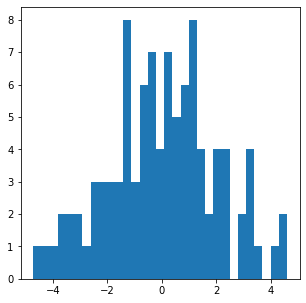

In [181]:
plt.hist(x, bins = 31);
plt.gcf().set_size_inches(5,5)